<a href="https://colab.research.google.com/github/JHyunjun/SNU/blob/main/a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Convolutional Generative Adversarial Network

This tutorial demonstrates how to generate images of handwritten digits using a [Deep Convolutional Generative Adversarial Network](https://arxiv.org/pdf/1511.06434.pdf) (DCGAN). The code is written using the [Keras Sequential API](https://www.tensorflow.org/guide/keras) with a `tf.GradientTape` training loop.


This material is based on [Deep Convolutional Generative Adversarial Network](https://www.tensorflow.org/tutorials/generative/dcgan) and may be copyrighted by the original writers. For educational uses only.

### Setup

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
# To generate GIFs
!pip install -q imageio
!pip install -q git+https://github.com/tensorflow/docs

     |████████████████████████████████| 1.0MB 25.0MB/s 


In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

### Load and prepare the dataset

You will use the MNIST dataset to train the generator and the discriminator. The generator will generate handwritten digits resembling the MNIST data.

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 32

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Create the models


In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
class Generator(tf.keras.Model):
  def __init__(self, channels=1):

    super(Generator, self).__init__()
    self.channels = channels
    
    ################ Implementation ################

    ################ Implementation ################
  def call(self, z):
    return self.net(z)

In [ ]:
class Discriminator(tf.keras.Model):
  def __init__(self, channels=1):
    super(Discriminator, self).__init__()
    self.channels = channels
    ################ Implementation ################

    ################ Implementation ################
  def call(self, x):
    return self.net(x)

In [ ]:
class DCGAN():
  def __init__(self, channels=1, lr=1e-4, batch_size=32, noise_dim=100, num_examples_to_generate=16):
    ################ Implementation ################

  ################ Implementation ################

dcgan = DCGAN(batch_size=BATCH_SIZE)

Use the (as yet untrained) generator to create an image.

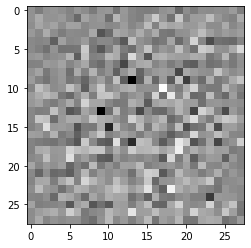

In [ ]:
noise = tf.random.normal([1, 100])
generated_image = dcgan.generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.

In [ ]:
decision = dcgan.discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00296607]], shape=(1, 1), dtype=float32)


## Train the model


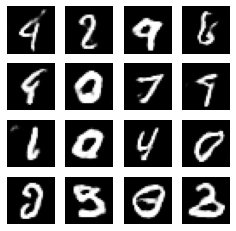

In [ ]:
EPOCHS = 50
dcgan.train(train_dataset, EPOCHS)

Restore the latest checkpoint.

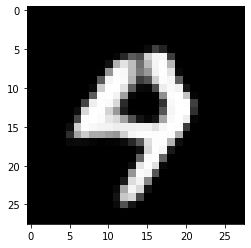

In [ ]:
# checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
dcgan.load()
noise = tf.random.normal([1, 100])
generated_image = dcgan.generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

## Create a GIF


In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

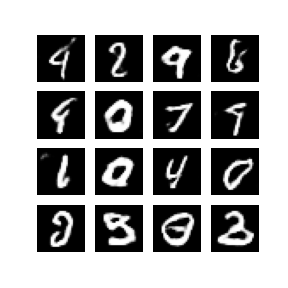

In [ ]:
display_image(EPOCHS)

Use `imageio` to create an animated gif using the images saved during training.

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


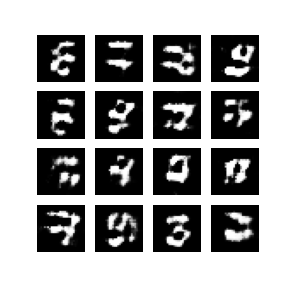

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)